In [17]:
from specutils import Spectrum1D
from astropy.io import fits

with fits.open('./III_181_stars.dat.fits') as hdul:
    # hdul.info()
    data = hdul[1].data
    pass
data[0]
# cols = hdul[1].columns
# cols.info()
# spec1d = Spectrum1D.read('./III_181_stars.dat.fits')

# import matplotlib.pyplot as plt

# plt.figure()
# plt.plot(spec1d.spectral_axis, spec1d.flux)

('HD 190429', 20, 3, 29.4, '+', 36, 1, 31, 6.78, 6.63, 'O4If+', 'hd190429a.dat', '')

In [27]:
import pandas as pd

spec_raw = pd.read_csv('./hr6060.dat.txt', sep='-', header=None)
spec_raw.columns = ['Lambda', 'Flux']

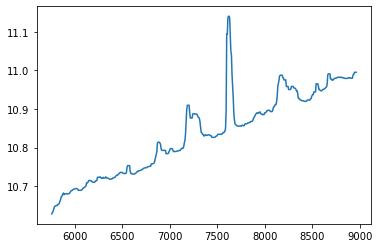

In [29]:
import astropy.units as u
from specutils.spectra import Spectrum1D
import matplotlib.pyplot as plt
from specutils.manipulation import median_smooth

# flux unit NOT REAL - hack to allow Spectrum1D to load since it has to be
# astropy type Quantity
flux = spec_raw['Flux'].to_numpy() * u.Jy
wavelength = spec_raw['Lambda'].to_numpy()* u.AA

# initialise spectrum
spec1d_raw = Spectrum1D(spectral_axis=wavelength, flux=flux)

# smoothening to remove cosmic rays; increase WIDTH until removed
# TODO improve to do properly, not this stupid way
spec1d = median_smooth(spec1d_raw, width=7)

# plot to see loaded spectrum
ax = plt.subplots()[1]
ax.plot(spec1d.spectral_axis, spec1d.flux)